In [1]:
import pickle

confusion_matrices = pickle.load(open('confusion_matrices_per_century.p','rb'))

In [31]:
label_list = ['B-LOC', 'B-PER', 'B-TIME', 'I-LOC', 'I-PER', 'I-TIME', 'O']

In [161]:
len(confusion_matrices)

4

In [97]:
confusion_matrices

{'GysBERT': {'21': array([[  503,    41,     0,     5,     5,     0,   197],
         [   21,   852,     0,     0,     9,     0,   188],
         [    0,     0,     0,     0,     0,     0,     0],
         [    2,     1,     0,    23,     3,     0,    20],
         [    1,    26,     0,     4,   683,     0,    70],
         [    0,     0,     0,     0,     0,     0,     0],
         [  161,   142,   283,    23,    56,   225, 63891]]),
  '19': array([[ 228,    3,    0,   17,    2,    0,   19],
         [   2,  324,    2,    1,   36,    0,   11],
         [   0,    1,   73,    0,    0,   38,    2],
         [   6,    0,    0,  131,    4,    0,   14],
         [   1,   14,    0,    1,  485,    5,   14],
         [   0,    0,    7,    0,    0,  254,    8],
         [  15,    7,    9,   10,   13,   20, 8484]]),
  '17-18': array([[  469,     7,     1,    12,     8,     0,    69],
         [   11,   838,     0,     1,   121,     0,    89],
         [    2,     0,   375,     0,     0,    36,  

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
sns.set_palette('Set2')

In [189]:
def diag_min(a):
    return min([a[i,i] for i in range(len(a))
                if a[i,i] >0])

In [183]:
# from matplotlib.colors import LogNorm
def plot_matrix(matrix):
    sns.set(rc={"figure.figsize":(6, 6)})
    cmap = sns.color_palette("Spectral_r")
    ax = sns.heatmap(matrix, ax=ax, annot=True,fmt='g',cmap=cmap,
                     robust=True,
                     vmax=diag_min(matrix), vmin=np.min(matrix),#center=10,
#                      cbar_kws={'label': 'Number of tokens'}#,
                cbar=False
#                      norm=LogNorm(matrix.min(),matrix.max())
                    )

    ax.set_xticklabels(label_list)
    ax.set_yticklabels(label_list)
    ax.xaxis.tick_top() # x axis on top

    ax.xaxis.set_label_position('top')
    ax.tick_params(length=0)
    ax.set_xlabel("Predicted label", fontsize = 10)
    ax.set_ylabel("True label", fontsize = 10)
    ax.figure.axes[-1].yaxis.label.set_size(10)

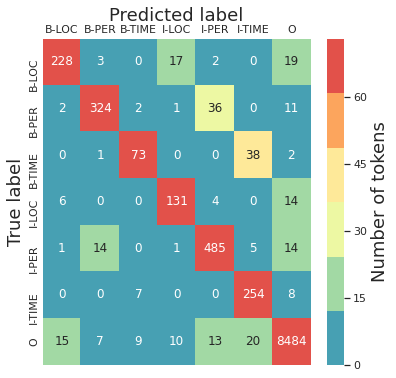

In [159]:
plot_matrix(confusion_matrices['GysBERT']['19'])

In [168]:
import pandas as pd

df = pd.DataFrame.from_records(confusion_matrices)
df

,BERT-multi-cased,BERTje,GysBERT,WikiNEuRal
21,"[[368, 35, 0, 18, 29, 0, 300], [20, 760, 0, 0,...","[[544, 8, 0, 6, 1, 0, 193], [23, 893, 0, 0, 3,...","[[503, 41, 0, 5, 5, 0, 197], [21, 852, 0, 0, 9...","[[681, 5, 0, 10, 0, 0, 25], [41, 911, 0, 0, 14..."
19,"[[209, 3, 0, 16, 1, 0, 24], [1, 301, 2, 0, 36,...","[[233, 3, 0, 20, 1, 0, 12], [2, 316, 2, 1, 38,...","[[228, 3, 0, 17, 2, 0, 19], [2, 324, 2, 1, 36,...","[[146, 3, 0, 24, 2, 0, 89], [5, 182, 0, 3, 107..."
17-18,"[[440, 15, 1, 10, 11, 0, 75], [9, 781, 0, 1, 1...","[[463, 8, 1, 14, 11, 0, 65], [7, 868, 0, 1, 11...","[[469, 7, 1, 12, 8, 0, 69], [11, 838, 0, 1, 12...","[[297, 15, 0, 8, 19, 0, 198], [17, 534, 0, 1, ..."


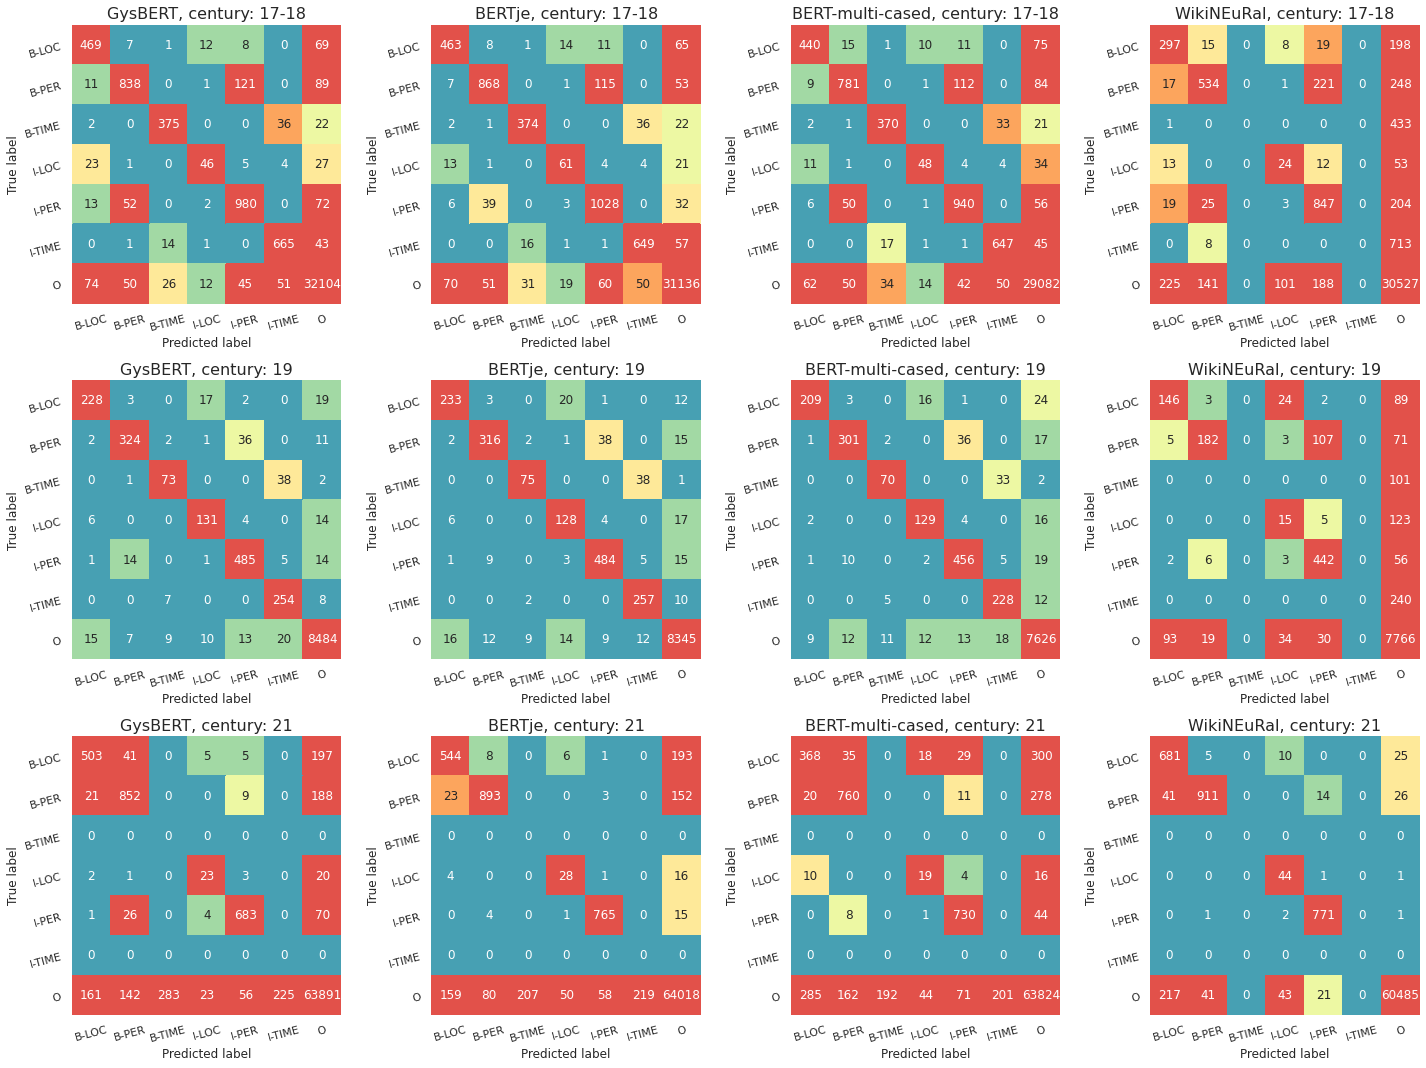

In [205]:
centuries = ['21','19','17-18']


fig, axs = plt.subplots(len(centuries), len(confusion_matrices), figsize=(5 * len(confusion_matrices), 15))
cmap = sns.color_palette("Spectral_r")

for i, century in enumerate(centuries[::-1]):
    data = [
        {"model_name": model_name, "confusion_matrix": confusion_matrices[model_name][century]}
        for model_name in confusion_matrices.keys()
    ]
    for j, algo_data in enumerate(data):
        matrix = algo_data["confusion_matrix"]
        df_cm = pd.DataFrame(matrix, index=label_list,
                             columns=label_list)
        sns.heatmap(df_cm, annot=True, ax=axs[i][j],
                    fmt='g',cmap=cmap, cbar=False,
                   robust=True,
                     vmax=diag_min(matrix), vmin=np.min(matrix))
        axs[i][j].set_title(algo_data["model_name"]+', century: '+century,fontsize=16)
        axs[i][j].set_xlabel("Predicted label")
        axs[i][j].set_ylabel("True label")
        axs[i][j].tick_params(axis='x', rotation=15)
        axs[i][j].tick_params(axis='y', rotation=15)
#         plt.xticks(rotation=45)
#         plt.yticks(rotation=45)


plt.tight_layout()
# plt.show()
plt.savefig('plots/confusion_matrices.pdf')

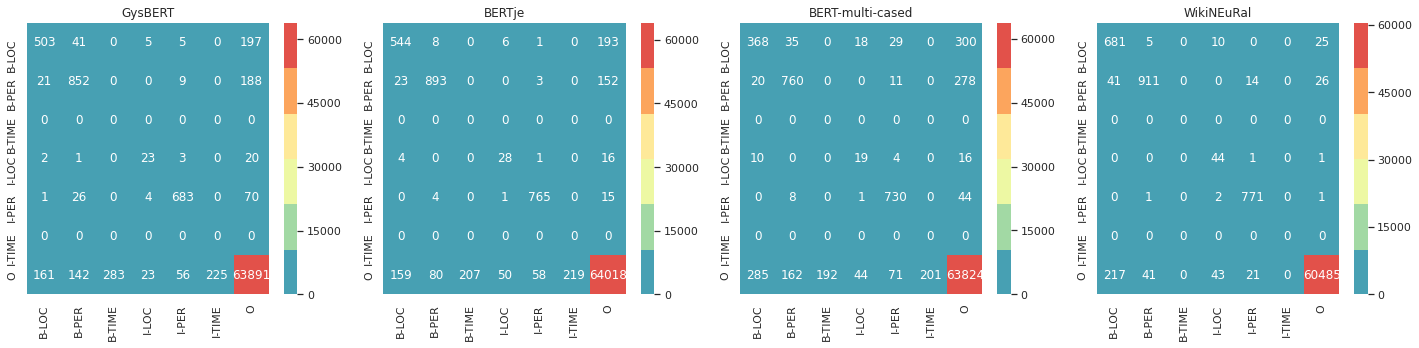

In [138]:
import pandas as pd
century = '21'

data = [
    {"model_name": model_name, "confusion_matrix": confusion_matrices[model_name][century]}
    for model_name in confusion_matrices.keys()
]

fig, axs = plt.subplots(1, len(data), figsize=(5 * len(data), 5))
cmap = sns.color_palette("Spectral_r")

for i, algo_data in enumerate(data):
    df_cm = pd.DataFrame(algo_data["confusion_matrix"], index=label_list,
                         columns=label_list)
    sns.heatmap(df_cm, annot=True, ax=axs[i],fmt='g',cmap=cmap)
    axs[i].set_title(algo_data["model_name"])
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

plt.tight_layout()
plt.show()

In [77]:
confusion_matrices['WikiNEuRal']['19']

array([[ 146,    3,    0,   24,    2,    0,   89],
       [   5,  182,    0,    3,  107,    0,   71],
       [   0,    0,    0,    0,    0,    0,  101],
       [   0,    0,    0,   15,    5,    0,  123],
       [   2,    6,    0,    3,  442,    0,   56],
       [   0,    0,    0,    0,    0,    0,  240],
       [  93,   19,    0,   34,   30,    0, 7766]])

In [81]:
matrix = confusion_matrices['WikiNEuRal']['19']
matrix

array([[ 146,    3,    0,   24,    2,    0,   89],
       [   5,  182,    0,    3,  107,    0,   71],
       [   0,    0,    0,    0,    0,    0,  101],
       [   0,    0,    0,   15,    5,    0,  123],
       [   2,    6,    0,    3,  442,    0,   56],
       [   0,    0,    0,    0,    0,    0,  240],
       [  93,   19,    0,   34,   30,    0, 7766]])

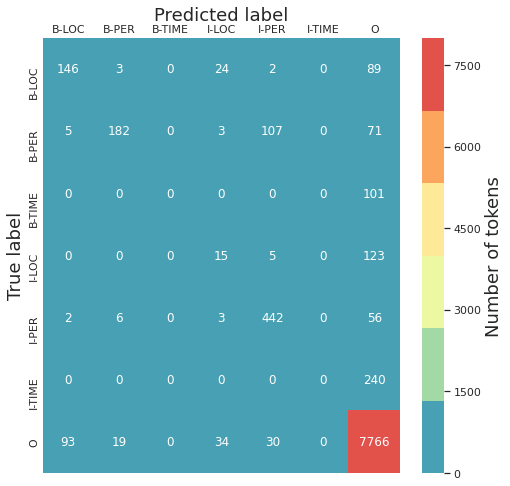

In [95]:
sns.set(rc={"figure.figsize":(8, 8)})

# ax = sns.heatmap(matrix/np.sum(matrix), annot=True, 
#             fmt='.1%', cmap='Blues')
# , center=40, vmin=0, vmax=96)

cmap = sns.color_palette("Spectral_r")
ax = sns.heatmap(matrix, annot=True,fmt='g',cmap=cmap,#center=3000,
                 vmax=8000, vmin=-1,
                 cbar_kws={'label': 'Number of tokens'})

ax.set_xticklabels(label_list)
ax.set_yticklabels(label_list)
ax.xaxis.tick_top() # x axis on top

ax.xaxis.set_label_position('top')
ax.tick_params(length=0)
ax.set_xlabel("Predicted label", fontsize = 18)
ax.set_ylabel("True label", fontsize = 18)
ax.figure.axes[-1].yaxis.label.set_size(18)

In [ ]:
sns.set(rc={"figure.figsize":(8, 6)})
ax=sns.heatmap(df_pvt, cmap=cmap, center=54, vmin=49, vmax=61, annot=True,
                     cbar_kws={'label': 'F-score on the ShadowLink dev set'})

ax.set_ylabel("Candidate filtering confidence threshold", fontsize = 18)
ax.set_xlabel("Weight of the entity relatedness score", fontsize = 18)
ax.figure.axes[-1].yaxis.label.set_size(18)
plt.tick_params(axis='both', which='major', labelsize=15)
# ax.xaxis.tick_top()  # x axis on top
ax.xaxis.set_label_position('top')
# ax.axes.xaxis.set_ticks([])
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()

plt.savefig('plots/heatmap_mw.pdf')